↓自分のgoogle driveにこんな感じでmp42json_dataフォルダとその中にjson,mp4フォルダを作り，mp4フォルダに動画を置いてください(jsonフォルダは空でok)

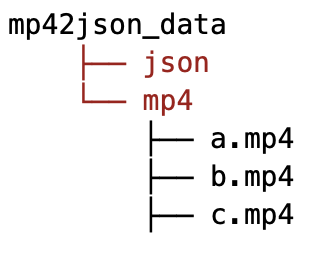

In [ ]:
# 自分のgoogle driveをマウント
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# ライブラリインストール
!pip install openpifpaf
!pip install scikit-video

In [ ]:
# ライブラリインポート
import openpifpaf
import skvideo.io
import os
import json

In [ ]:
# google driveから動画を取得
videos_dir_path = '/content/drive/MyDrive/mp42json_data/mp4'
videos_name = [v for v in os.listdir(videos_dir_path) if v.endswith('.mp4')]
print('{}個の動画を解析します：{}'.format(len(videos_name), videos_name))

for video_name in videos_name:
  print('{}を解析中...'.format(video_name))
  video_name = video_name.split('.')[0]
  predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16', json_data=True)
  video_path= '{}/{}.mp4'.format(videos_dir_path, video_name)
  video_data = skvideo.io.vreader(video_path)
  predictions = {}

  # 動画を1フレームずつ読み込んで姿勢推定
  for i,frame in enumerate(video_data):
    prediction, gt_anns, image_meta = predictor.numpy_image(frame)
    predictions['frame{:0>5}'.format(i+1)] = prediction

  # 自分のgoogle driveにjsonファイルを出力
  with open('/content/drive/MyDrive/mp42json_data/json/{}.json'.format(video_name), 'w') as f:
      json.dump(predictions, f, indent=1)

print('{}個の動画から推定した関節データをjsonファイルとしてあなたのgoogle driveに出力しました(/mp42json_data/json)'.format(len(videos_name)))